In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

# Import the data

In [8]:
df = pd.read_csv('UCI_Credit_Card.csv')

# If we want to read data from an excel document, we can use read_excel()

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


We see a bunch of columns for the variables collected for each customer. The columns are...
+ **LIMIT_BAL**, Credit limit
+ **PAY_**, When the last 6 bills were payed
+ **BALL_AMT**, What the last 6 bills were
+ **PAY_AMT**, How much the last payments were

**NOTE**: The last column name, **default payment next month**, is long. Let's change it to default.

In [11]:
df.rename({'default.payment.next.month':'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Also, the values in the **ID** column were randomly assigned, making it uniformative, so we can drop it...

In [12]:
df.drop('ID', axis=1, inplace=True) ## set axis=0 to remove rows, and axis=1 to remove columns
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [28]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

# Dealing with Missing Data

Let's first make sure whether there are missing data in this data set.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

It seems good....But we need to check out whether this columns only contain allowed values. 
+ **SEX** 
    + 1 for male 
    + 2 for female
+ **EDUCATION** 
    + 1 for graduate school
    + 2 for university
    + 3 for high school
    + 4 for others
+ **MARRIAGE** 
    + 1
    + 2
    + 3
+ **DEFAULT** 
    + 0
    + 1

Let's start by making sure **SEX** only contains the numbers 1 and 2

In [15]:
df['SEX'].unique()

array([2, 1])

 **BAM!** It does. Now let's look at **EDUCATION** can make sure it only contains 1, 2, 3, and 4.

In [16]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

We can see that, for reasons unknown, in addition to the allowed numbers, 1, 2, 3, and 4, **EDUCATION** also contains 0, 5 and 6. It is possible that 0 represents missing data and 5 and 6 represent categories not mentioned in the specification, but that is just a guess.

Now let's look at **MARRIAGE** and make sure it only contains 1, 2, 3

In [17]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

Like **EDUCATION**, **MARRIAGE** contains 0, which I'm guessing represents missing data. 

Now let's look at **DEFAULT** and make sure it only contains 0 or 1.

In [18]:
df['DEFAULT'].unique()

array([1, 0])

It does!

Now, let't try to deal with missing data. 

First, let's see how many rows contain missing values.

In [20]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

Only 68 data of those 30000 data contain missing values. We can delete those missing data.

In [21]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [22]:
len(df_no_missing)

29932

Check again that there is no 0 in **EDUCATION** and no 0 in **MARRIAGE**

In [24]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [25]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

# Downsample the data

**Support Vector Machines** are great with small datasets, but not awesome with large ones, and this dataset, while not huge, is big enough to take a long time to optimize with **Cross Validation**. So we'll downsample both categories, customers wo did and did not default, to 1000 each. 

In [29]:
# split dataset 
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [35]:
# downsample the dataset that did not default
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=1818)
len(df_no_default_downsampled)

1000

In [36]:
# downsample the dataset that defaulted
df_default_downsampled = resample(df_default,
                                 replace=False,
                                 n_samples=1000,
                                 random_state=1818)
len(df_default_downsampled)

1000

In [37]:
# merge this two into a single dataframe
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

# Format Data

## Split X and y

In [38]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
# alternatively X = df_downsample.iloc[:,:-1].copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
13434,70000.0,1,1,2,30,0,0,0,0,0,...,11402.0,8464.0,6464.0,-1000.0,1586.0,1000.0,0.0,0.0,0.0,0.0
28156,80000.0,2,2,1,32,0,0,0,0,0,...,79147.0,81159.0,69573.0,70306.0,3000.0,4000.0,4000.0,5000.0,8000.0,2800.0
350,90000.0,1,1,2,26,0,0,-1,0,0,...,1940.0,1940.0,0.0,23101.0,1541.0,4200.0,0.0,0.0,23101.0,3000.0
5119,500000.0,2,2,1,47,0,0,0,0,0,...,112662.0,66679.0,70090.0,73728.0,5000.0,10000.0,5000.0,5000.0,5000.0,5000.0
27190,230000.0,1,1,1,29,2,0,0,0,0,...,303082.0,307038.0,116506.0,19085.0,9062.0,10978.0,10361.0,2507.0,490.0,308.0


In [40]:
y = df_downsample['DEFAULT'].copy()
y.value_counts()

1    1000
0    1000
Name: DEFAULT, dtype: int64

**NOTE**:

What are the benefits of using copy()?

Using copy() ensures that the original data df_downsample is not modified when we modify X or y. In other words, if we make a mistake, we can just re-copy df_downsample, rather than reload the original data.

## One-Hot Encoding

**NOTE:** There are many different ways to do **One-Hot Encoding** in Python. Two of the most popular methods are
+ ColumnTransformer() (from **scikit-learn**)
+ get_dummies() (from **pandas**)
and both methods have pros and cons.

+ ColumnTransformer()
    + (**Pros**) It creates a persistent function that can validate data that you get in the future. For example, if you build your **Support Vector Machine** using a categorical variable **favorite color** that has **red**, **blue**, and **green** options, then ColumnTransformer() can remember those options and later on when your **Support Vector Machine** is being used in a production system, if someone says their favorite color is **orange**, then ColumnTransformer() can throw an error or handle the situation in some other nice way.
    + (**Cons**) It turns your data into an array and looses all of the column names, making it harder to verify that your usage of ColumnTransformer() worked as you intended it to.

+ get_dummies()
    + (**Pros**) It leaves your data in a dataframe and retains the column names, making it easier to verify that it worked as intended. 
    + (**Cons**) It does not have the persistent behavior that ColumnTransformer() has. 
    
In conclusion, for the sake of learning how **One-Hot Encoding** works, I prefer to use get_dummies(). However, once you are comfortable with **One-Hot Encoding**, I encourage you to investigate using ColumnTransformer().

In [41]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                      'EDUCATION',
                                      'MARRIAGE',
                                      'PAY_0',
                                      'PAY_2',
                                      'PAY_3',
                                      'PAY_4',
                                      'PAY_5',
                                      'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_5,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_6,PAY_6_7
13434,70000.0,30,36201.0,25510.0,11402.0,8464.0,6464.0,-1000.0,1586.0,1000.0,...,0,0,0,0,1,0,0,0,0,0
28156,80000.0,32,77808.0,77180.0,79147.0,81159.0,69573.0,70306.0,3000.0,4000.0,...,0,0,0,0,1,0,0,0,0,0
350,90000.0,26,39128.0,20473.0,1940.0,1940.0,0.0,23101.0,1541.0,4200.0,...,0,0,0,1,0,0,0,0,0,0
5119,500000.0,47,182516.0,104838.0,112662.0,66679.0,70090.0,73728.0,5000.0,10000.0,...,0,0,0,0,1,0,0,0,0,0
27190,230000.0,29,306836.0,295324.0,303082.0,307038.0,116506.0,19085.0,9062.0,10978.0,...,0,0,0,0,1,0,0,0,0,0


## Centering and Scaling

The **Radical Basis Function(RBF)** that we are using with our **Support Vector Machine** assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So we need to do this to both the training and testing datasets.

**NOTE:** We split data into training and testing datasets and then scale them **separately** to avoid **Data Leakage**. **Data Leakage** occurs when informaion about the training dataset currupts or influences the testing dataset. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1818)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Build A Preliminary Support Vector Machine

At long last, the data is correctly formatted for making a **Support Vector Machine**!!! So, let's do it.

In [44]:
clf_svm = SVC(random_state=1818)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=1818)

OK, we've built a **Support Vector Machine** for classification. Let's see how it performs on the **Testing Dataset** and draw a **Confusion Matrix.**

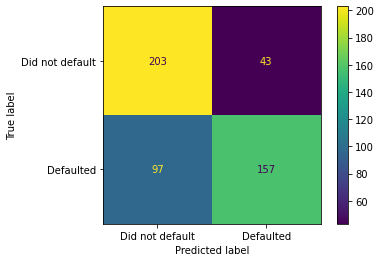

In [45]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["Did not default", "Defaulted"]) 

Let's try to improve predictions using **Cross Validation** to optimize the parameters.

# Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a **Support Vector Machine** is all about finding the best value for $\gamma$, and, potentially, the regularization parameter, C. So let's see if we can find better parameters values using cross validation in hope that we can improve the accuracy with the **Testing Dataset**.

Since we have two parameters to optimize, we will use GridSearchCV(). We specify a bunch of potential values for $\gamma$, and C, and GridSeachCV() tests all possible combinations of the parameters for us. 

In [47]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]
## NOTE: We are including C=1 and gamma='scale'
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    ##There are other options for this parameter
    ##for example
    ##scoring='f1',
    ##scoring='roc_auc'
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


As we can see, the ideal value for C is 100, and the ideal value for $\gamma$ is 0.001.

# Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine.

Now that we have the ideal values for C and $\gamma$ we can build the **final** Support Vector Machine.

In [49]:
clf_svm = SVC(random_state=1818, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=1818)

Now, let's draw another confusion matrix to see if the optimized support vector machine does better. 

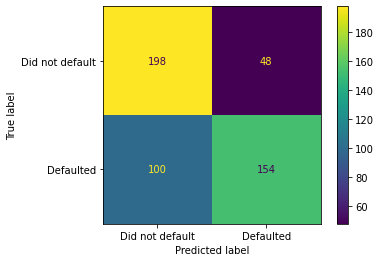

In [50]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["Did not default", "Defaulted"]) 

## Draw a support vector machine decision boundary

In [51]:
len(df_downsample.columns)

24

This is a problem, since we can't draw a 24-dimensional graph. Thus, we use PCA. But, we need to first determine how accurate the shrunken graph will be using **a scree plot**.

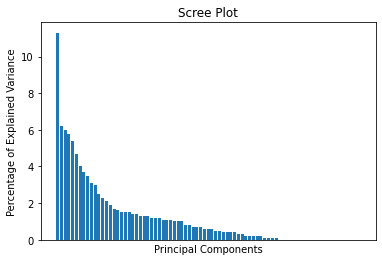

In [52]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(axis='x',          ## changes apply to the x-axis
                which='both',      ## both major and minor ticks are affected
                bottom=False,      ## ticks along the bottom edge are off
                top=False,         ## ticks along the top edge are off
                labelbottom=False) ## labels along the bottom edge are off

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much different from PC3 or PC4, which doesn't bode well for dimension redunction. Since we don't have a choice, let's go with it, but don't be surprised if the final graph looks funky.